In [1]:
cd /scratch/si699s004w21_class_root/si699s004w21_class/shared_data/Team_10/corelogic

/gpfs/accounts/si699s004w21_class_root/si699s004w21_class/shared_data/Team_10/corelogic


## Load Data

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import *
import sys
from pylab import *
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns

In [3]:
import pandas as pd
data1 = pd.read_csv('complete_data.csv')

In [4]:
data = data1.copy()

In [5]:
data['DeedCategory'] = data['DeedCategory'].replace(np.nan, 'N')
data['DeedCategory'].value_counts()

# U == Foreclosure ; N == Not 

N    1587774
U     116392
Name: DeedCategory, dtype: int64

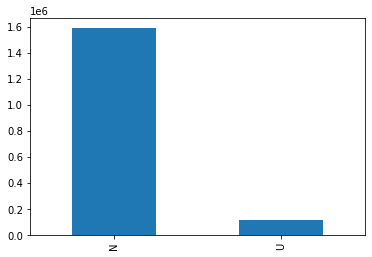

In [6]:
data.DeedCategory.value_counts().plot.bar()

In [7]:
data['DeedCategory'].value_counts(normalize=True)

N    0.931701
U    0.068299
Name: DeedCategory, dtype: float64

In [8]:
data.columns.get_loc('20120901')

110

In [9]:
heat_df = data.iloc[:,3:107]

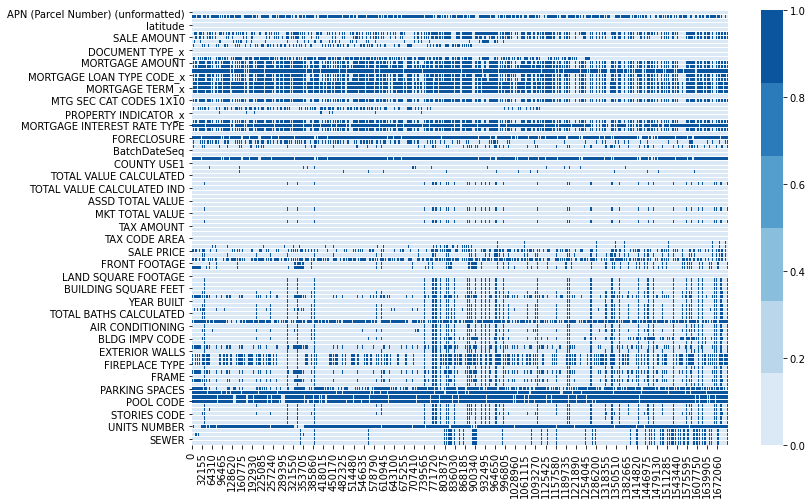

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(heat_df.T.isnull(),cmap=sns.color_palette("Blues"))

## Deal with missing data

In [12]:
threshold = 15.0 # percent of missing values for entire county 
columns_to_drop = [] 
columns_tofix_numpy = [] 

for column in data.columns:
    target = 0
    try: 
        if np.isnan(data[column]).sum() > 0:
            target = 1 
    except:
        target = 2
    percent_missing = round((data[column].isna().sum())/len(data),2)*100
    #print(f"{column} -- TYPE: {data[column].dtype} -- NULL: {percent_missing}%")
    if percent_missing > threshold:
        columns_to_drop.append(column)
    else:
        if target == 1:
            columns_tofix_numpy.append(column)

In [13]:
df1 = data.drop(columns = columns_to_drop)
print(f"reduced {len(data.columns)} to {len(df1.columns)} by dropping columns with more than 15% incompleteness.")

reduced 205 to 167 by dropping columns with more than 15% incompleteness.


In [14]:
for column in df1.columns:

   #percent_missing = round((data2[column].isna().sum())/len(data),2)*100
    print(f"{column} -- TYPE: {df1[column].dtype} -- NULL: {percent_missing}%")

Unnamed: 0 -- TYPE: int64 -- NULL: 0.0%
Unnamed: 0_x -- TYPE: int64 -- NULL: 0.0%
Unnamed: 1 -- TYPE: int64 -- NULL: 0.0%
APN (Parcel Number) (unformatted) -- TYPE: object -- NULL: 0.0%
OWNER ETAL INDICATOR -- TYPE: int64 -- NULL: 0.0%
latitude -- TYPE: float64 -- NULL: 0.0%
longitude -- TYPE: float64 -- NULL: 0.0%
SALE DATE (YYYYMMDD) -- TYPE: float64 -- NULL: 0.0%
DOCUMENT TYPE_x -- TYPE: object -- NULL: 0.0%
TRANSACTION TYPE_x -- TYPE: object -- NULL: 0.0%
PRI-CAT-CODE -- TYPE: object -- NULL: 0.0%
DEED SEC CAT CODES 2X10 -- TYPE: object -- NULL: 0.0%
PROPERTY INDICATOR_x -- TYPE: float64 -- NULL: 0.0%
INTER FAMILY -- TYPE: bool -- NULL: 0.0%
RESALE/NEW CONSTRUCTION -- TYPE: object -- NULL: 0.0%
RESIDENTIAL MODEL INDICATOR_x -- TYPE: object -- NULL: 0.0%
BatchDateSeq -- TYPE: int64 -- NULL: 0.0%
DeedCategory -- TYPE: object -- NULL: 0.0%
COUNTY USE1 -- TYPE: object -- NULL: 0.0%
ZONING -- TYPE: object -- NULL: 0.0%
ABSENTEE OWNER STATUS -- TYPE: object -- NULL: 0.0%
TOTAL VALUE CALC

In [17]:
d4 = df1.drop(columns = ['Unnamed: 0', 'Unnamed: 1', 'APN (Parcel Number) (unformatted)', 'OWNER ETAL INDICATOR',
                           'SALE DATE (YYYYMMDD)', 'DOCUMENT TYPE_x','WATER\n',
                          'TRANSACTION TYPE_x', 'PRI-CAT-CODE', 'DEED SEC CAT CODES 2X10', 'PROPERTY INDICATOR_x',
                          'INTER FAMILY', 'RESALE/NEW CONSTRUCTION', 'RESIDENTIAL MODEL INDICATOR_x', 'BatchDateSeq'])
# d4 = df1.copy()
# 'PROPERTY LEVEL LATITUDE_x', 'PROPERTY LEVEL LONGITUDE_x',

In [18]:
from sklearn import preprocessing

for column in d4.columns:
    
    #to encode 
    if d4[column].dtype == 'object':
        print(f"{column}")
        d4[column] = d4[column].replace(np.nan, 'missing')
            
        try:
            le = preprocessing.LabelEncoder()
            contents = d4[column].unique()
            le.fit(contents)
            d4[column] = le.transform(d4[column])
            print('yep\n')
        except:
            print('fail\n')
        
    elif d4[column].dtype == 'float64':
        # np.nan 
        d4[column] = d4[column].replace(np.nan, 0)
        print('two')
        
        try:
            d4[column] = d4[column].astype(int)
        except: 
            print('failed on type\n')


two
two
DeedCategory
yep

COUNTY USE1
yep

ZONING
yep

ABSENTEE OWNER STATUS
yep

two
two
two
TOTAL VALUE CALCULATED IND
yep

LAND VALUE CALCULATED IND
yep

IMPROVEMENT VALUE CALCULATED IND
yep

two
two
two
two
two
two
two
two
two
TAX CODE AREA
yep

DOCUMENT TYPE_y
yep

two
RESIDENTIAL MODEL INDICATOR_y
yep

two
two
two
two
BUILDING SQUARE FEET IND
yep

two
two
two
two
two
two
two
AIR CONDITIONING
yep

BASEMENT DESCRIPTION
fail

BLDG CODE
yep

CONDITION
yep

EXTERIOR WALLS
yep

FOUNDATION
yep

FRAME
fail

HEATING
yep

two
ROOF TYPE
yep

two
two
two
ELECTRIC/ENERGY
yep

FUEL
yep

SEWER
fail

WATER
yep

two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two
two


In [19]:
d4.head()

,Unnamed: 0_x,latitude,longitude,DeedCategory,COUNTY USE1,ZONING,ABSENTEE OWNER STATUS,TOTAL VALUE CALCULATED,LAND VALUE CALCULATED,IMPROVEMENT VALUE CALCULATED,...,20170201,20161001,20170601,20161101,20171201,20170301,20170101,20170501,20171101,20170401
0,0,32,-96,0,0,223,1,103270,17000,86270,...,22,20,21,20,24,21,23,20,21,21
1,568602,32,-96,0,0,223,1,103270,17000,86270,...,22,20,21,20,24,21,23,20,21,21
2,688138,32,-96,0,0,223,1,103270,17000,86270,...,22,20,21,20,24,21,23,20,21,21
3,745121,32,-96,1,0,223,1,103270,17000,86270,...,22,20,21,20,24,21,23,20,21,21
4,766297,32,-96,0,0,223,1,103270,17000,86270,...,22,20,21,20,24,21,23,20,21,21


## Upsample

In [20]:
from sklearn.utils import resample

In [21]:
d4['DeedCategory'].value_counts()

0    1587774
1     116392
Name: DeedCategory, dtype: int64

In [23]:
# Separate majority and minority classes
df_majority = d4[d4.DeedCategory==0]
df_minority = d4[d4.DeedCategory==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1587774,    # to match majority class
                                 random_state=699) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [24]:
df_upsampled.DeedCategory.value_counts()

1    1587774
0    1587774
Name: DeedCategory, dtype: int64

In [26]:
# df_upsampled.to_csv('upsampled_data.csv')

In [68]:
# cp upsampled_data.csv /scratch/si699s004w21_class_root/si699s004w21_class/shared_data/Team_10/corelogic

In [27]:
# d4.columns.get_loc("20151001")
d4_noimage = d4.iloc[:,:70]

In [83]:
d4_noimage.shape

(1704166, 70)

In [28]:
# Separate majority and minority classes
df_majority = d4_noimage[d4_noimage.DeedCategory==0]
df_minority = d4_noimage[d4_noimage.DeedCategory==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1587774,    # to match majority class
                                 random_state=699) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled_noimage = pd.concat([df_majority, df_minority_upsampled])

In [85]:
# df_upsampled_noimage.to_csv('upsampled_data_noimage.csv')

In [86]:
cp upsampled_data_noimage.csv /scratch/si699s004w21_class_root/si699s004w21_class/shared_data/Team_10/corelogic

## Downsample

In [29]:
# Separate majority and minority classes
df_majority = d4[d4.DeedCategory==0]
df_minority = d4[d4.DeedCategory==1]
 
# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=116392,    # to match majority class
                                 random_state=699) # reproducible results
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [30]:
# Display new class counts
df_downsampled.DeedCategory.value_counts()

1    116392
0    116392
Name: DeedCategory, dtype: int64

In [109]:
df_downsampled.to_csv('downsampled_data.csv')

In [105]:
d4_noimage = d4.iloc[:,:70]

In [114]:
# Separate majority and minority classes
df_majority = d4_noimage[d4_noimage.DeedCategory=='N']
df_minority = d4_noimage[d4_noimage.DeedCategory=='U']
 
# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=116392,    # to match majority class
                                 random_state=699) # reproducible results
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [115]:
df_downsampled.to_csv('downsampled_data_noimage.csv')

In [116]:
pwd

'/home/hzhaoyin/Desktop'

In [97]:
cd /scratch/si699s004w21_class_root/si699s004w21_class/shared_data/Team_10/corelogic

/gpfs/accounts/si699s004w21_class_root/si699s004w21_class/shared_data/Team_10/corelogic


In [102]:
cd Desktop

/home/hzhaoyin/Desktop


In [118]:
cp downsampled_data_noimage.csv /scratch/si699s004w21_class_root/si699s004w21_class/shared_data/Team_10/corelogic